<h1>Conteúdo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Scipy" data-toc-modified-id="Scipy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scipy</a></span><ul class="toc-item"><li><span><a href="#find_peaks_cwt" data-toc-modified-id="find_peaks_cwt-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>find_peaks_cwt</a></span></li><li><span><a href="#savgol_filter" data-toc-modified-id="savgol_filter-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>savgol_filter</a></span></li><li><span><a href="#curve_fit" data-toc-modified-id="curve_fit-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>curve_fit</a></span></li><li><span><a href="#Junção-de-função-de-ajuste-com-uncertainties" data-toc-modified-id="Junção-de-função-de-ajuste-com-uncertainties-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Junção de função de ajuste com uncertainties</a></span></li><li><span><a href="#Integração" data-toc-modified-id="Integração-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Integração</a></span></li></ul></li><li><span><a href="#lmfit" data-toc-modified-id="lmfit-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>lmfit</a></span><ul class="toc-item"><li><span><a href="#Ajuste-de-duas-curvas-com-o-mesmo-conjunto-de-parâmetros" data-toc-modified-id="Ajuste-de-duas-curvas-com-o-mesmo-conjunto-de-parâmetros-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ajuste de duas curvas com o mesmo conjunto de parâmetros</a></span></li></ul></li></ul></div>

# Scipy

Scipy é um pacote com várias funções científicas. Há funções para integração, achar picos, alisamento de dados, ajuste de curvas. Vamos ver algumas dessas funções aqui.

In [9]:
import scipy as sp
import scipy.signal as sig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## find_peaks_cwt

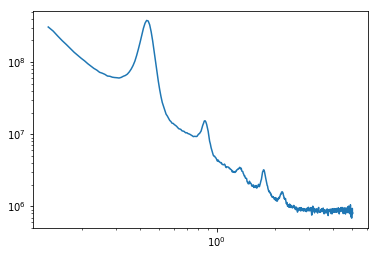

In [6]:
saxs = pd.read_csv('./dados-1/37.dat', sep='  ', engine='python', names=['q', 'I'])
plt.plot(saxs['q'], saxs['I'])
plt.xscale('log')
plt.yscale('log')

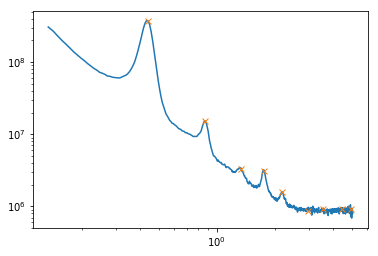

In [27]:
picos = sig.find_peaks_cwt(saxs['I'], np.arange(10, 40))
plt.plot(saxs['q'], saxs['I'])
plt.plot(saxs.loc[picos, 'q'], saxs.loc[picos, 'I'], marker='x', linewidth=0)
plt.xscale('log')
plt.yscale('log')

## savgol_filter

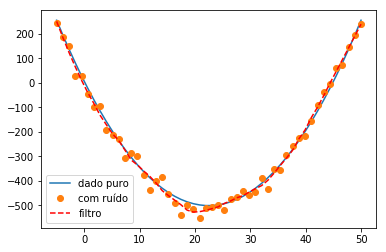

In [74]:
x = np.linspace(-5, 50)
y = x ** 2 - 45 * x + 5
err = np.random.normal(0,25,len(x))
# Essa função gera um erro aleatório
yerr = y + err

filtro = sig.savgol_filter(yerr, 11, 2)  
# Altere o valor da janela para ver as diferenças. Tem que ser ímpar.
# Altere também o grau do filtro.

plt.plot(x, y, label='dado puro')
plt.plot(x, yerr, marker='o', linewidth=0, label='com ruído')
plt.plot(x, filtro, 'r--', label='filtro')
plt.legend()

## curve_fit

Text(0.5,1,'Fit: a=1.0; b=-43.8; c=-7.5')

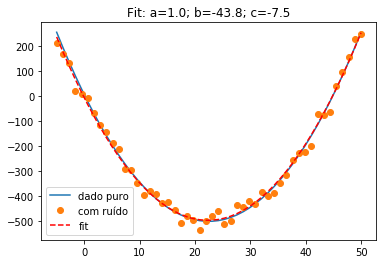

In [80]:
def parabola(x, a, b, c):
    return a * x ** 2 + b * x + c

x = np.linspace(-5, 50)
y = parabola(x, 1, -45, 5)
err = np.random.normal(0,25,len(x))
# Essa função gera um erro aleatório
yerr = y + err

popt, pcov = sp.optimize.curve_fit(parabola, x, yerr, p0=(1.5, -30, 3))
# popt retorna os parâmetros do ajuste
# pcov retorna a matriz de covariâncias
# para obter as faixas de incerteza, é necessário pegar a raiz da diagonal de pcov
perr = np.sqrt(np.diag(pcov))
yfit = popt[0] * x ** 2 + popt[1] * x + popt[2]

plt.plot(x, y, label='dado puro')
plt.plot(x, yerr, marker='o', linewidth=0, label='com ruído')
plt.plot(x, yfit, 'r--', label='fit')
plt.legend()
plt.title(f'Fit: a={popt[0]:.1f}; b={popt[1]:.1f}; c={popt[2]:.1f}')

## Junção de função de ajuste com uncertainties

Text(0.5,1,'Fit: a=0.986+/-0.015; b=-44.4+/-0.7; c=6+/-7')

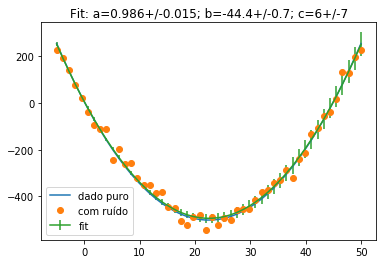

In [89]:
from uncertainties import ufloat

def parabola(x, a, b, c):
    return a * x ** 2 + b * x + c

x = np.linspace(-5, 50)
y = parabola(x, 1, -45, 5)
err = np.random.normal(0,25,len(x))
# Essa função gera um erro aleatório
yerr = y + err

popt, pcov = sp.optimize.curve_fit(parabola, x, yerr, p0=(1.5, -30, 3))
# popt retorna os parâmetros do ajuste
# pcov retorna a matriz de covariâncias
# para obter as faixas de incerteza, é necessário pegar a raiz da diagonal de pcov
perr = np.sqrt(np.diag(pcov))

a = ufloat(popt[0], perr[0])
b = ufloat(popt[1], perr[1])
c = ufloat(popt[2], perr[2])

yfit = parabola(x, a, b, c) # Cria uma curva com erro propagado
yfit_vals = [i.nominal_value for i in yfit] # Separa os valores nominais dos erros
yfit_errs = [i.std_dev for i in yfit] # Separa os erros de cada ponto do ajuste

plt.plot(x, y, label='dado puro')
plt.plot(x, yerr, marker='o', linewidth=0, label='com ruído')
plt.errorbar(x, yfit_vals, yerr=yfit_errs, label='fit')
plt.legend()
plt.title(f'Fit: a={a}; b={b}; c={c}')

## Integração

Text(20,190,'$\\int_{0}^{40} -x^2 + 40x =$10667')

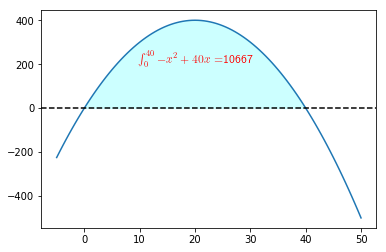

In [144]:
def parabola(x, a, b, c):
    return a * x ** 2 + b * x + c

x = np.linspace(-5, 50, 100)
y = parabola(x, -1, +40, 0)
err = np.random.normal(0,25,len(x))
# Essa função gera um erro aleatório
yerr = y + err

integração = sp.integrate.quad(parabola, 0, 40, args=(-1, 40, 0))

plt.plot(x, y)
plt.axhline(0, color='k', linestyle='--')
plt.gca().fill_between(x[y>=0], 0, y[y>=0], color='#CCFFFF')
plt.text(20, 190, r'$\int_{0}^{40} -x^2 + 40x =$' + str(round(integração[0])), color='r', 
         fontsize=12, usetex=True, horizontalalignment='center')

# lmfit

## Ajuste de duas curvas com o mesmo conjunto de parâmetros

In [158]:
from lmfit import minimize, Parameters, report_fit

# Definição das funções de ajuste e função de resíduo

def maxwell_elast(w, G0, lambda1):
    return G0 * (lambda1 * w) ** 2 / (1 + (lambda1 * w) ** 2)
    
def maxwell_visc(w, G0, lambda1):
    return G0 * (lambda1 * w)      / (1 + (lambda1 * w) ** 2)

def residual(params, x, datasets):
    model_elast = maxwell_elast(x, params['G0'], params['tr'])
    model_visc  = maxwell_visc (x, params['G0'], params['tr'])
    
    resid1 = datasets[0] - model_elast
    resid2 = datasets[1] - model_visc
    return np.concatenate((resid1, resid2))

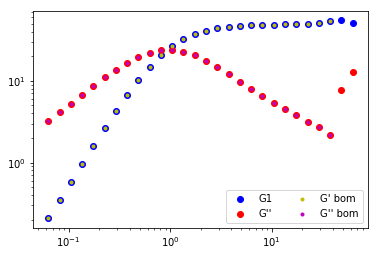

In [157]:
# %load ./respostas/Pandas-reologia.py
df = pd.read_csv('./dados-2/Reologia.txt', 
                 names=['num_exp', 'GP', 'Eta', 'w', 'G1', 'G2', 'T', 'Tau', 'lixo2'],
                 encoding='latin1',
                header=4,
                sep=';',
                decimal=',',
                na_values=' ')

OT_f = df['num_exp'].str.startswith('1')
OF_f = df['num_exp'].str.startswith('2')
CF_f = df['num_exp'].str.startswith('3')

OT = df[OT_f][['Tau', 'G1', 'G2']]
OF = df[OF_f][['w', 'G1', 'G2']]
CF = df[CF_f][['GP', 'Eta']]

# Visualização

plt.plot(OF['w'], OF['G1'], 'bo', label="G1")
plt.plot(OF['w'], OF['G2'], 'ro', label="G''")
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Remoção dos 2 pontos finais ruins
OF_bom = OF.iloc[:-2, :]

plt.plot(OF_bom['w'], OF_bom['G1'], 'yo', label="G' bom", markersize=3)
plt.plot(OF_bom['w'], OF_bom['G2'], 'mo', label="G'' bom", markersize=3)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 18
    # data points      = 52
    # variables        = 2
    chi-square         = 42.52964
    reduced chi-square = 0.85059
    Akaike info crit   = -6.45421
    Bayesian info crit = -2.55172
[[Variables]]
    G0:   49.7028810 +/- 0.257906 (0.52%) (init= 10)
    tr:   1.01448346 +/- 0.014481 (1.43%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(G0, tr)                    = -0.364


Text(0,0.5,"G', G''/Pa")

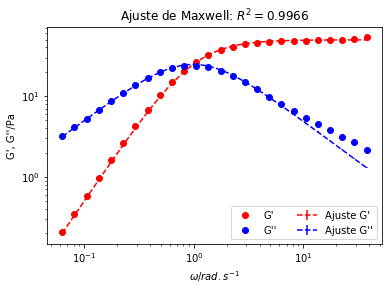

In [195]:
# Criação dos parâmetros de ajuste
params = Parameters()
params.add('G0', 10., vary=True, min=0)
params.add('tr', 1. , vary=True, min=0)

# Minimização do Chi quadrado
fit = minimize( residual, params, args=(OF_bom['w'], [OF_bom['G1'], OF_bom['G2']]) )
report_fit(fit)

# Criação dos valores de y
G0 = ufloat(fit.params['G0'].value, fit.params['G0'].stderr)
tr = ufloat(fit.params['tr'].value, fit.params['tr'].stderr)
uc_G1_novo = maxwell_elast(OF_bom['w'], G0, tr)
uc_G2_novo = maxwell_visc(OF_bom['w'], G0, tr)
G1_novo = [i.nominal_value for i in uc_G1_novo]
G2_novo = [i.nominal_value for i in uc_G2_novo]
G1_err = [i.std_dev for i in uc_G1_novo]
G2_err = [i.std_dev for i in uc_G2_novo]

# Cálculo do R^2
SSres = fit.chisqr
SStot_elast = sum((OF_bom['G1'] - np.mean(OF_bom['G1'] )) ** 2)
SStot_visc = sum((OF_bom['G2']  - np.mean(OF_bom['G2'] )) ** 2)
SStot = SStot_elast + SStot_visc
R2 = 1 - SSres / SStot

# Plot da curva de ajuste
plt.plot(OF_bom['w'], OF_bom['G1'], 'ro', label="G'")
plt.plot(OF_bom['w'], OF_bom['G2'], 'bo', label="G''")
plt.errorbar(OF_bom['w'], G1_novo, G1_err, linestyle='--', color='r', label="Ajuste G'")
plt.errorbar(OF_bom['w'], G2_novo, G2_err, linestyle='--', color='b', label="Ajuste G''")
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.title(f'Ajuste de Maxwell: $R^2=${R2:.4f}')
plt.xlabel(r'$\omega/rad.s^{-1}$')
plt.ylabel("G', G''/Pa")